<font size=5> Preprocessing

In [1]:
import pandas as pd
import numpy as np
import operator
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [2]:
rent_data = pd.read_excel("https://www.dffh.vic.gov.au/sites/default/files/documents/202109/Moving%20annual%20rents%20by%20suburb%20-%20June%20quarter%202021.xlsx", sheet_name='All properties')
rent_data = rent_data.loc[2:173]
rent_data.drop(['All properties'],axis=1,inplace=True)
rent_data = rent_data.loc[:,::2]
rent_data.rename(columns={'Unnamed: 1':'suburb'}, inplace = True)
rent_data.head()

,suburb,Unnamed: 3,Unnamed: 5,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,...,Unnamed: 155,Unnamed: 157,Unnamed: 159,Unnamed: 161,Unnamed: 163,Unnamed: 165,Unnamed: 167,Unnamed: 169,Unnamed: 171,Unnamed: 173
2,Albert Park-Middle Park-West St Kilda,260,260,270,275,275,280,280,290,300,...,550,560,565,595,600,585,560,550,500,500
3,Armadale,200,200,205,210,215,220,225,230,235,...,480,480,480,485,500,500,500,495,450,440
4,Carlton North,260,260,265,270,270,275,280,280,290,...,580,577,580,580,585,590,590,590,580,580
5,Carlton-Parkville,260,260,260,260,260,260,265,270,270,...,439,440,430,420,404,400,400,395,350,340
6,CBD-St Kilda Rd,320,320,320,320,320,320,320,320,320,...,500,500,510,510,510,495,460,420,380,370


In [3]:
#Preprocess suburb
data_suburb = pd.DataFrame()
sublist = []
for i in rent_data["suburb"]:
    index = rent_data[rent_data.suburb == i].index.tolist()[0]
    if operator.contains(i, "-"):
        j = i.split("-")
        for sub in j:
            sublist.append(sub)
            series = pd.DataFrame(rent_data[index-2:index-1])
            data_suburb = pd.concat([data_suburb, series])
    else:
        sublist.append(i)
        series = pd.DataFrame(rent_data[index-2:index-1])
        data_suburb = pd.concat([data_suburb, series])

data_suburb.insert(0, "suburb new", sublist)
data_suburb.drop(data_suburb.columns[1:2],axis=1,inplace=True)
data_suburb

,suburb new,Unnamed: 3,Unnamed: 5,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,...,Unnamed: 155,Unnamed: 157,Unnamed: 159,Unnamed: 161,Unnamed: 163,Unnamed: 165,Unnamed: 167,Unnamed: 169,Unnamed: 171,Unnamed: 173
2,Albert Park,260,260,270,275,275,280,280,290,300,...,550,560,565,595,600,585,560,550,500,500
2,Middle Park,260,260,270,275,275,280,280,290,300,...,550,560,565,595,600,585,560,550,500,500
2,West St Kilda,260,260,270,275,275,280,280,290,300,...,550,560,565,595,600,585,560,550,500,500
3,Armadale,200,200,205,210,215,220,225,230,235,...,480,480,480,485,500,500,500,495,450,440
4,Carlton North,260,260,265,270,270,275,280,280,290,...,580,577,580,580,585,590,590,590,580,580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Wanagaratta,125,125,130,130,130,130,130,135,135,...,280,290,289,290,290,300,300,310,320,330
157,Warragul,130,135,135,135,135,135,140,145,150,...,340,350,350,348,350,350,360,380,375,380
158,Warrnambool,130,135,135,135,140,140,140,145,145,...,310,320,330,330,340,340,340,350,350,360
159,Wodonga,145,145,150,150,150,150,150,150,150,...,310,320,320,325,330,330,330,330,340,350


In [4]:
#remove duplicates
data_suburb = data_suburb.drop_duplicates(subset='suburb new', inplace=False)

In [5]:
#remove dockland data as it has '-', which can not be convert to interger
past_rent = data_suburb.drop([8])
past_rent.to_csv("../data/curated/rent_data_finish.csv")
past_rent

,suburb new,Unnamed: 3,Unnamed: 5,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,...,Unnamed: 155,Unnamed: 157,Unnamed: 159,Unnamed: 161,Unnamed: 163,Unnamed: 165,Unnamed: 167,Unnamed: 169,Unnamed: 171,Unnamed: 173
2,Albert Park,260,260,270,275,275,280,280,290,300,...,550,560,565,595,600,585,560,550,500,500
2,Middle Park,260,260,270,275,275,280,280,290,300,...,550,560,565,595,600,585,560,550,500,500
2,West St Kilda,260,260,270,275,275,280,280,290,300,...,550,560,565,595,600,585,560,550,500,500
3,Armadale,200,200,205,210,215,220,225,230,235,...,480,480,480,485,500,500,500,495,450,440
4,Carlton North,260,260,265,270,270,275,280,280,290,...,580,577,580,580,585,590,590,590,580,580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Traralgon,125,120,125,125,125,125,130,125,130,...,280,285,290,295,300,300,310,320,330,345
156,Wanagaratta,125,125,130,130,130,130,130,135,135,...,280,290,289,290,290,300,300,310,320,330
157,Warragul,130,135,135,135,135,135,140,145,150,...,340,350,350,348,350,350,360,380,375,380
158,Warrnambool,130,135,135,135,140,140,140,145,145,...,310,320,330,330,340,340,340,350,350,360


In [6]:
#covert str to int
count = 0
for i in past_rent.columns.tolist():
    count += 1
    if count > 1:
        past_rent[i]=pd.to_numeric(past_rent[i])
    

In [7]:
#get yearly data
year = 2000
list_col = []
count = 1
num = 0
for i in past_rent.columns[1:87]:
    list_col.append(i)
    if count == 4:
        past_rent[year+num] =  (past_rent[list_col[0]] + past_rent[list_col[1]] + past_rent[list_col[2]] + past_rent[list_col[3]])/4
        count = 1
        num += 1
        list_col = []
    else:
        count += 1
    

/var/folders/h8/pms0342s7y575pq3kcbl9db00000gn/T/ipykernel_37054/2944130200.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  past_rent[year+num] =  (past_rent[list_col[0]] + past_rent[list_col[1]] + past_rent[list_col[2]] + past_rent[list_col[3]])/4
/var/folders/h8/pms0342s7y575pq3kcbl9db00000gn/T/ipykernel_37054/2944130200.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  past_rent[year+num] =  (past_rent[list_col[0]] + past_rent[list_col[1]] + past_rent[list_col[2]] + past_rent[list_col[3]])/4
/var/folders/h8/pms0342s7y57

In [8]:
past_rent[2021] = (past_rent['Unnamed: 171'] + past_rent['Unnamed: 173'])/2
past_rent.drop(past_rent.columns[1:87],axis=1,inplace=True)
past_rent.head()



/var/folders/h8/pms0342s7y575pq3kcbl9db00000gn/T/ipykernel_37054/543100782.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  past_rent[2021] = (past_rent['Unnamed: 171'] + past_rent['Unnamed: 173'])/2


,suburb new,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2,Albert Park,266.25,281.25,300.00,293.75,300.00,302.50,317.00,362.5,389.75,...,460.0,461.5,472.50,492.5,515.00,527.75,562.50,567.50,573.75,500.0
2,Middle Park,266.25,281.25,300.00,293.75,300.00,302.50,317.00,362.5,389.75,...,460.0,461.5,472.50,492.5,515.00,527.75,562.50,567.50,573.75,500.0
2,West St Kilda,266.25,281.25,300.00,293.75,300.00,302.50,317.00,362.5,389.75,...,460.0,461.5,472.50,492.5,515.00,527.75,562.50,567.50,573.75,500.0
3,Armadale,203.75,222.50,231.25,237.50,238.75,243.25,261.25,295.0,331.25,...,385.0,395.0,393.75,399.5,402.50,445.00,486.25,481.25,498.75,445.0
4,Carlton North,263.75,276.25,290.00,290.00,298.75,301.25,322.75,345.0,388.75,...,495.0,492.5,515.00,530.0,525.75,545.00,566.75,579.25,588.75,580.0


In [9]:
#add a row to show the median rprice among all suburb yearly
data_sum = past_rent[[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]].median()
past_rent.loc[past_rent.index.max()+1] = data_sum
past_rent.loc[past_rent.index.max(),'suburb new'] = 'total'
past_rent.tail()

,suburb new,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
156,Wanagaratta,127.50,131.25,135.00,142.50,153.75,162.50,172.50,181.25,187.50,...,221.25,235.0,247.50,250.00,260.00,266.25,274.25,287.25,300.0,325.0
157,Warragul,133.75,138.75,152.50,163.75,173.75,182.50,187.50,193.25,202.75,...,260.00,267.5,273.00,280.00,293.75,305.00,323.75,347.00,360.0,377.5
158,Warrnambool,133.75,141.25,150.00,163.75,178.75,193.75,203.25,212.50,222.50,...,282.50,280.0,280.00,285.00,288.75,292.25,300.00,322.50,342.5,355.0
159,Wodonga,147.50,150.00,155.00,167.50,181.25,192.50,210.00,218.75,227.50,...,261.25,270.0,280.00,287.50,290.00,298.75,302.50,318.75,330.0,345.0
160,total,176.25,184.00,196.25,203.75,210.75,218.75,227.50,251.75,289.00,...,350.00,350.0,352.75,363.75,373.25,393.75,411.25,422.50,420.0,405.0


In [10]:
#make a dataframe which contain median rent and year
data_list = past_rent.iloc[215].values.tolist()
Y=(data_list[1:23])
X = ['2000','2001','2002','2003','2004','2005','2006','2007',\
    '2008','2009','2010','2011','2012','2013','2014','2015',\
    '2016','2017','2018','2019','2020','2021']
total = {"Year": X,
         "Mediann": Y}
yearly_rent= pd.DataFrame(total)
yearly_rent.to_csv("../data/curated/total_rent_data_yearly.csv", index=False)

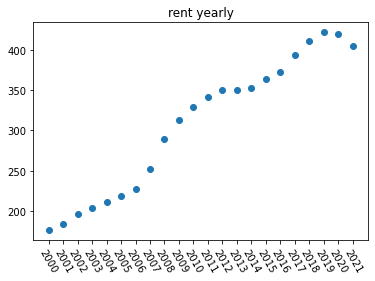

In [11]:
#scatter plot 
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.xticks(rotation=300)
plt.title('rent yearly')
plt.show()


<font size = 5> Modelling

In [12]:
yearly_rent = pd.read_csv("../data/curated/total_rent_data_yearly.csv")
x = yearly_rent.iloc[:,:-1].values
y = yearly_rent.iloc[:,-1].values

In [13]:
Poly_regressor = PolynomialFeatures(degree=2)
Poly_X = Poly_regressor.fit_transform(x)
regressor = LinearRegression()
regressor.fit(Poly_X,y)

LinearRegression()

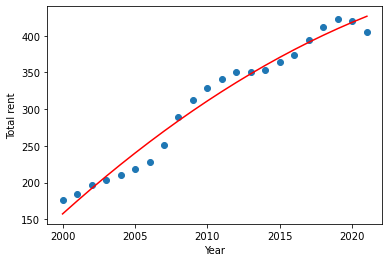

In [14]:
plt.scatter(x,y)
plt.plot(x,regressor.predict(Poly_regressor.fit_transform(x)),color='red')
plt.xlabel('Year')
plt.ylabel('Total rent')
plt.show()

In [15]:
predicted_2023 = regressor.predict(Poly_regressor.fit_transform([[2023]]))
predicted_2024 = regressor.predict(Poly_regressor.fit_transform([[2024]]))
predicted_2025 = regressor.predict(Poly_regressor.fit_transform([[2025]]))
print(predicted_2023)
print(predicted_2024)
print(predicted_2025)

[441.28013834]
[448.00264682]
[454.25681113]


<font size=5>past rent rate

In [16]:
data_22 = pd.read_csv("../rent_data/renew(15).csv")
data_22 = data_22[['price','suburb']]
data_22.head()

,price,suburb
0,410.0,SOUTH YARRA
1,310.0,HEATHERTON
2,310.0,HEATHERTON
3,380.0,ABBOTSFORD
4,380.0,EAST MELBOURNE


In [18]:
data_22_median = data_22.groupby("suburb").median()
data_22_median


,price
suburb,
ABBOTSFORD,550.0
ABERFELDIE,520.0
ALBERT PARK,1150.0
ALPHINGTON,540.0
ALTONA,280.0
...,...
WILLIAMS LANDING,380.0
WILLIAMSTOWN,940.0
WINDSOR,487.5


In [ ]:
count=0
index_list = []
for index in data:
    count+=1
    index_list.append(index)
    if count >=3:
        data[str(index)+'_rate'] = (data[str(index)] - data[str(index_list[count-2])]) / data[str(index_list[count-2])] *100

